## Telecom Churn: Logistic Regression with PCA

With 21 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

### Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv('churn_data.csv')

In [3]:
customer_data = pd.read_csv('customer_data.csv')

In [4]:
internet_data = pd.read_csv('internet_data.csv')

In [5]:
print(len(churn_data))
print(len(customer_data))
print(len(internet_data))

7043
7043
7043


In [6]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [8]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


### Data Preparation

In [10]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [11]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\3615927451.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'],1)
C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\3615927451.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1= os.drop(['OnlineSecurity_No internet service'],1)
C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\3615927451.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 =ob.drop(['OnlineBackup_No internet service'],1)
C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\3615927451.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['

### Dropping the repeated variables

In [12]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\398896987.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',


In [13]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [14]:
#The varaible was imported as a string we need to convert it to float

telecom['TotalCharges']  = pd.to_numeric(telecom['TotalCharges'] , errors='coerce')

#telecom['TotalCharges'] =telecom['TotalCharges'].convert_objects(convert_numeric=True)
#telecom['tenure'] = telecom['tenure'].astype(int).astype(float)

In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7033 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers

In [16]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [17]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7033.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.610181
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.500000
50%,29.000000,70.350000,0.000000,1397.650000
75%,55.000000,89.850000,0.000000,3794.500000
90%,69.000000,102.600000,1.000000,5976.380000
95%,72.000000,107.400000,1.000000,6923.380000
99%,72.000000,114.729000,1.000000,8039.826000


From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [18]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.14
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [19]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [20]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

In [21]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [22]:
normalized_df=(df-df.mean())/df.std()
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
telecom = pd.concat([telecom,normalized_df],axis=1)
telecom.head()

C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\3444282567.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)


,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.279901,-1.161622,-0.994194
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064483,-0.260817,-0.173740
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239163,-0.363861,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512610,-0.747784,-0.195248
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239163,0.196234,-0.940457


### Checking the Churn Rate

In [23]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.574719181003836

We have almost 27% churn rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [24]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [25]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [26]:
import statsmodels.api as sm

In [27]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4923
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.5
Date:                Sun, 31 Dec 2023   Deviance:                       4023.1
Time:                        10:46:03   Pearson chi2:                 6.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2857
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9212      1.160     -2.518      0.012      -5.195      -0.647
PhoneService                              0.5260      0.574      0.916      0.360      -0.600       1.652
PaperlessBilling                          0.3324      0.090      3.711      0.000       0.157       0.508
SeniorCitizen                             0.2418      0.101      2.387      0.017       0.043       0.440
Partner                                   0.0922      0.094      0.980      0.327      -0.092       0.277
Dependents                               -0.1725      0.107     -1.610      0.107      -0.383       0.037
Contract_One year                        -0.6418      0.128     -5.012      0.000      -0.893      -0.391
Contract_Two year                        -1.3529      0.213     -6.357      0.000      -1.770      -0.936
PaymentMethod_Credit card (automatic)    -0.0284      0.136     -0.209      0.835      -0.295       0.239
PaymentMethod_Electronic check            0.3702      0.113      3.284      0.001       0.149       0.591
PaymentMethod_Mailed check               -0.0277      0.139     -0.200      0.842      -0.299       0.244
gender_Male                              -0.0371      0.078     -0.475      0.635      -0.190       0.116
MultipleLines_No                         -0.0167      0.199     -0.084      0.933      -0.408       0.374
MultipleLines_Yes                         0.5427      0.384      1.413      0.158      -0.210       1.295
InternetService_Fiber optic               2.3589      0.947      2.492      0.013       0.504       4.214
InternetService_No                       -3.0141      1.294     -2.329      0.020      -5.551      -0.477
OnlineSecurity_No                         0.0984      0.058      1.708      0.088      -0.015       0.211
OnlineSecurity_Yes                       -0.0055      0.171     -0.032      0.974      -0.340       0.329
OnlineBackup_No                          -0.0146      0.054     -0.270      0.788      -0.121       0.092
OnlineBackup_Yes                          0.1076      0.169      0.638      0.524      -0.223       0.438
DeviceProtection_No                      -0.1105      0.055     -1.992      0.046      -0.219      -0.002
DeviceProtection_Yes                      0.2035      0.169      1.203      0.229      -0.128       0.535
TechSupport_No                            0.0274      0.058      0.469      0.639      -0.087       0.142
TechSupport_Yes                           0.0655      0.171      0.384      0.701      -0.269       0.401
StreamingTV_No                           -0.3544      0.130     -2.718      0.007      -0.610      -0.099
StreamingTV_Yes                           0.4474      0.261      1.715      0.086      -0.064       0.959
Streaming

### Correlation Matrix

In [28]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

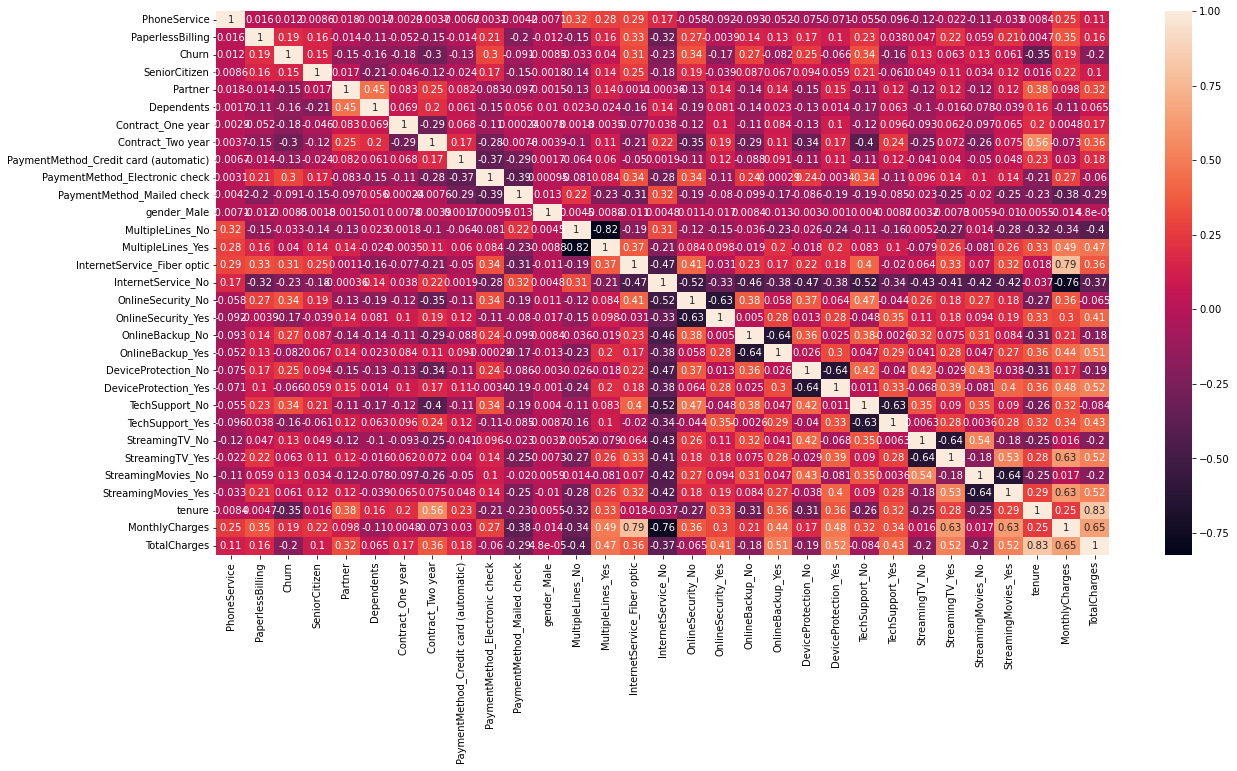

In [29]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [30]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\1191024438.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
C:\Users\Prabhdeep\AppData\Local\Temp\ipykernel_17608\1191024438.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)


### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

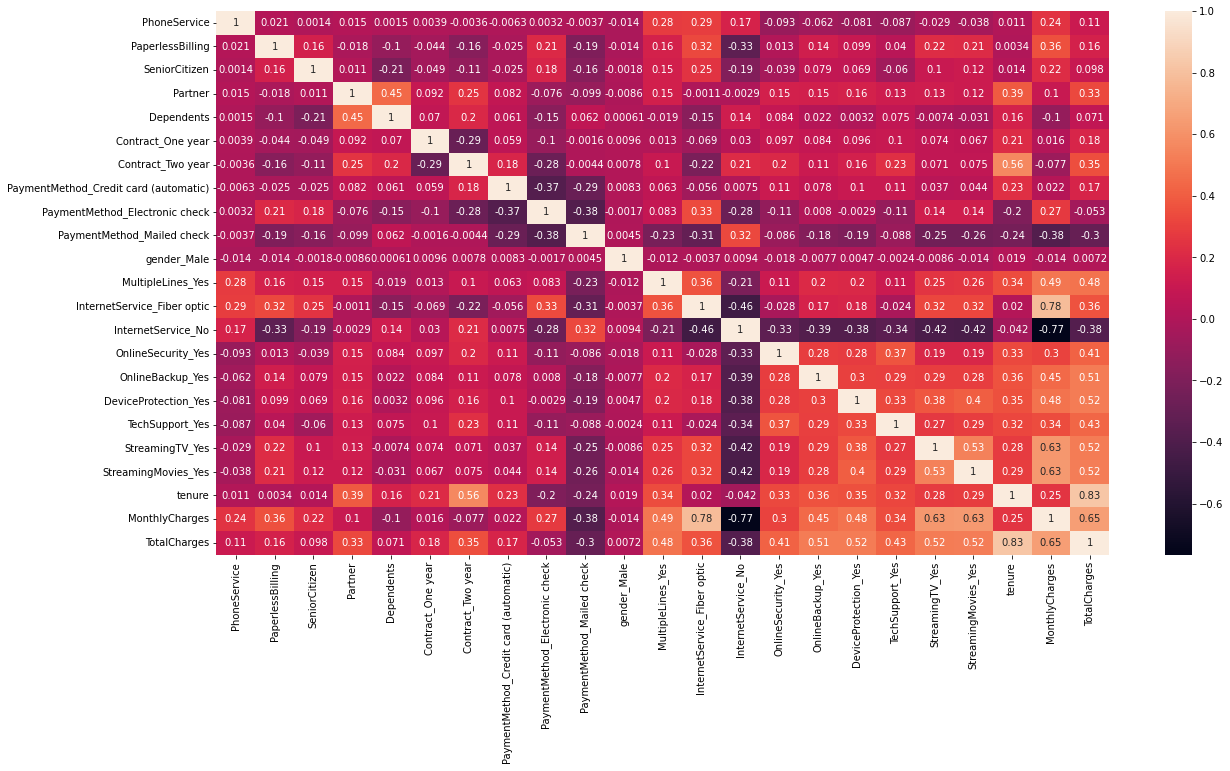

In [31]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [32]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4923
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.5
Date:                Sun, 31 Dec 2023   Deviance:                       4023.1
Time:                        10:46:06   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2857
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.6314      1.511     -2.403      0.016      -6.593      -0.670
PhoneService                              0.5093      0.769      0.662      0.508      -0.999       2.017
PaperlessBilling                          0.3324      0.090      3.711      0.000       0.157       0.508
SeniorCitizen                             0.2418      0.101      2.387      0.017       0.043       0.440
Partner                                   0.0922      0.094      0.980      0.327      -0.092       0.277
Dependents                               -0.1725      0.107     -1.610      0.107      -0.383       0.037
Contract_One year                        -0.6418      0.128     -5.012      0.000      -0.893      -0.391
Contract_Two year                        -1.3529      0.213     -6.357      0.000      -1.770      -0.936
PaymentMethod_Credit card (automatic)    -0.0284      0.136     -0.209      0.835      -0.295       0.239
PaymentMethod_Electronic check            0.3702      0.113      3.284      0.001       0.149       0.591
PaymentMethod_Mailed check               -0.0277      0.139     -0.200      0.842      -0.299       0.244
gender_Male                              -0.0371      0.078     -0.475      0.635      -0.190       0.116
MultipleLines_Yes                         0.5594      0.211      2.647      0.008       0.145       0.974
InternetService_Fiber optic               2.3589      0.947      2.492      0.013       0.504       4.214
InternetService_No                       -2.3039      0.959     -2.401      0.016      -4.184      -0.423
OnlineSecurity_Yes                       -0.1039      0.213     -0.488      0.625      -0.521       0.313
OnlineBackup_Yes                          0.1222      0.208      0.587      0.557      -0.286       0.530
DeviceProtection_Yes                      0.3140      0.209      1.500      0.134      -0.096       0.724
TechSupport_Yes                           0.0381      0.214      0.178      0.859      -0.381       0.457
StreamingTV_Yes                           0.8019      0.388      2.066      0.039       0.041       1.563
StreamingMovies_Yes                       0.8060      0.386      2.087      0.037       0.049       1.563
tenure                                   -1.5865      0.187     -8.476      0.000      -1.953      -1.220
MonthlyCharges                           -1.8457      1.133     -1.628      0.103      -4.067       0.376
TotalCharges                              0.7780      0.195      3.999      0.000       0.397       1.159
=========================================================================================================
"""

### Feature Selection Using RFE

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\Prabhdeep\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prabhdeep\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[False  True False False False  True  True False  True False False  True
 False  True  True  True False False False False False False False False
  True False  True  True  True  True]
[ 5  1  3 18  4  1  1 11  1 12 17  1 16  1  1  1  7  6 14  9 10  2  8 15
  1 13  1  1  1  1]


In [34]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [35]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [36]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4923
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.5
Date:                Sun, 31 Dec 2023   Deviance:                       4023.1
Time:                        10:46:07   Pearson chi2:                 6.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2857
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9212      1.160     -2.518      0.012      -5.195      -0.647
PhoneService                              0.5260      0.574      0.916      0.360      -0.600       1.652
PaperlessBilling                          0.3324      0.090      3.711      0.000       0.157       0.508
SeniorCitizen                             0.2418      0.101      2.387      0.017       0.043       0.440
Partner                                   0.0922      0.094      0.980      0.327      -0.092       0.277
Dependents                               -0.1725      0.107     -1.610      0.107      -0.383       0.037
Contract_One year                        -0.6418      0.128     -5.012      0.000      -0.893      -0.391
Contract_Two year                        -1.3529      0.213     -6.357      0.000      -1.770      -0.936
PaymentMethod_Credit card (automatic)    -0.0284      0.136     -0.209      0.835      -0.295       0.239
PaymentMethod_Electronic check            0.3702      0.113      3.284      0.001       0.149       0.591
PaymentMethod_Mailed check               -0.0277      0.139     -0.200      0.842      -0.299       0.244
gender_Male                              -0.0371      0.078     -0.475      0.635      -0.190       0.116
MultipleLines_No                         -0.0167      0.199     -0.084      0.933      -0.408       0.374
MultipleLines_Yes                         0.5427      0.384      1.413      0.158      -0.210       1.295
InternetService_Fiber optic               2.3589      0.947      2.492      0.013       0.504       4.214
InternetService_No                       -3.0141      1.294     -2.329      0.020      -5.551      -0.477
OnlineSecurity_No                         0.0984      0.058      1.708      0.088      -0.015       0.211
OnlineSecurity_Yes                       -0.0055      0.171     -0.032      0.974      -0.340       0.329
OnlineBackup_No                          -0.0146      0.054     -0.270      0.788      -0.121       0.092
OnlineBackup_Yes                          0.1076      0.169      0.638      0.524      -0.223       0.438
DeviceProtection_No                      -0.1105      0.055     -1.992      0.046      -0.219      -0.002
DeviceProtection_Yes                      0.2035      0.169      1.203      0.229      -0.128       0.535
TechSupport_No                            0.0274      0.058      0.469      0.639      -0.087       0.142
TechSupport_Yes                           0.0655      0.171      0.384      0.701      -0.269       0.401
StreamingTV_No                           -0.3544      0.130     -2.718      0.007      -0.610      -0.099
StreamingTV_Yes                           0.4474      0.261      1.715      0.086      -0.064       0.959
Streaming

In [37]:
X_test[col].shape
#res = modres.predict(X_test[col])

(2110, 13)

### Making Predictions

In [38]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.358152
1,0.002349
2,0.031562
3,0.355552
4,0.276269


In [39]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
941,0
3729,0
1760,0
2282,1
1871,0


In [40]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,941,0,0.358152
1,3729,0,0.002349
2,1760,0,0.031562
3,2282,1,0.355552
4,1871,0,0.276269


In [41]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,941,0,0.358152,0
1,3729,0,0.002349,0
2,1760,0,0.031562,0
3,2282,1,0.355552,0
4,1871,0,0.276269,0


### Model Evaluation

In [42]:
from sklearn import metrics

In [43]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1359,  180],
       [ 261,  310]], dtype=int64)

In [44]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.7909952606635071

In [45]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

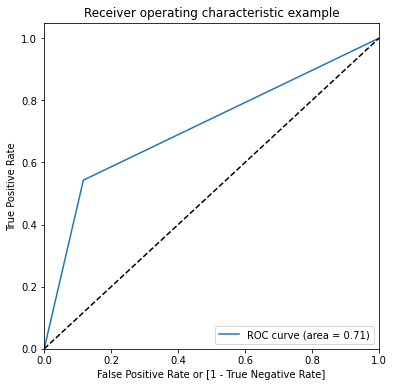

(array([0.        , 0.11695906, 1.        ]),
 array([0.        , 0.54290718, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [46]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

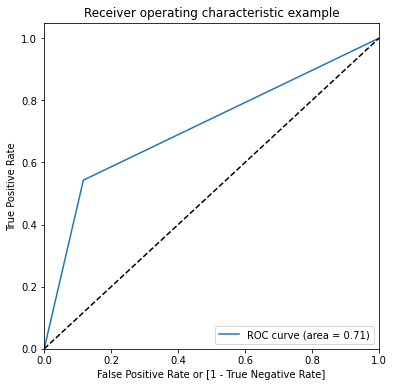

'0.84'

In [47]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

#### We see an overall AUC score of 0.84 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Can PCA help reduce our effort?

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [48]:
X_train.shape

(4923, 30)

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(random_state=42)

In [51]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [52]:
pca.components_

array([[ 1.84845485e-02,  6.91140224e-02,  3.18705403e-02,
         9.78029235e-02,  1.37670171e-02,  3.57809642e-02,
         7.67251767e-02,  4.17496285e-02,  1.01549193e-02,
        -9.61960217e-02,  1.47755608e-04, -1.42934344e-01,
         1.61418893e-01,  1.36705549e-01, -1.21748116e-01,
         9.92584354e-03,  1.11822272e-01, -3.19999856e-02,
         1.53748101e-01, -3.94902657e-02,  1.61238381e-01,
        -1.16561199e-04,  1.21864677e-01, -5.45258311e-02,
         1.76273947e-01, -5.70348893e-02,  1.78783005e-01,
         4.51093613e-01,  4.63457668e-01,  5.64475705e-01],
       [-1.30657007e-02, -1.51391099e-01, -7.38338652e-02,
         1.12236743e-01,  1.13368613e-01,  5.48968261e-02,
         1.99754818e-01,  6.78194275e-02, -1.92815744e-01,
         7.59908715e-02,  7.81701865e-03,  3.71533354e-02,
        -5.02190361e-02, -2.52000057e-01,  2.32400207e-01,
        -2.77575439e-01,  4.51752318e-02, -2.28657304e-01,
        -3.74290330e-03, -2.29737693e-01, -2.66251371e-

Looking at the explained variance ratio for each component

In [53]:
pca.explained_variance_ratio_

array([3.28608973e-01, 1.75627098e-01, 5.89931081e-02, 4.56635361e-02,
       3.69896109e-02, 3.45267648e-02, 3.32950292e-02, 3.10347929e-02,
       2.94637645e-02, 2.81549833e-02, 2.72001978e-02, 2.50981231e-02,
       2.45456139e-02, 2.40323377e-02, 2.24131948e-02, 2.11777423e-02,
       1.53608393e-02, 1.11784197e-02, 8.46870725e-03, 7.24748885e-03,
       6.00465530e-03, 4.86736921e-03, 4.76506441e-05, 1.30172925e-31,
       5.96242486e-32, 9.06182517e-33, 2.73374810e-33, 2.12768579e-33,
       2.11120395e-33, 1.26617217e-33])

Making a scree plot for the explained variance

In [54]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

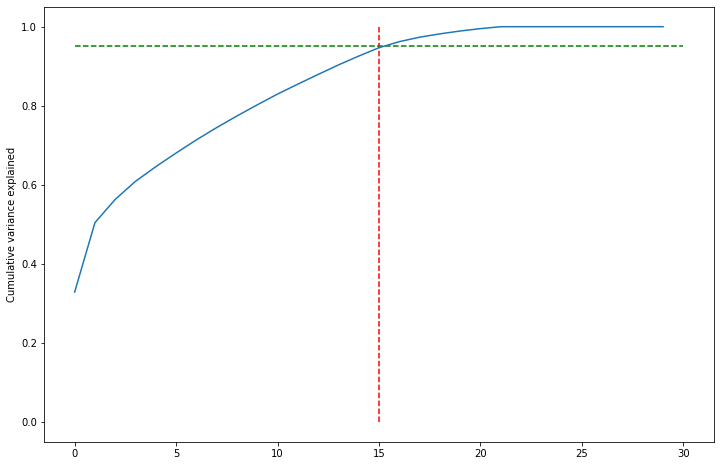

In [55]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 16 components

In [56]:
from sklearn.decomposition import IncrementalPCA

In [57]:
pca_final = IncrementalPCA(n_components=16)

In [58]:
df_train_pca = pca_final.fit_transform(X_train)

In [59]:
df_train_pca.shape

(4923, 16)

In [60]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [61]:
corrmat.shape

(16, 16)

Plotting the heatmap of the corr matrix

<AxesSubplot:>

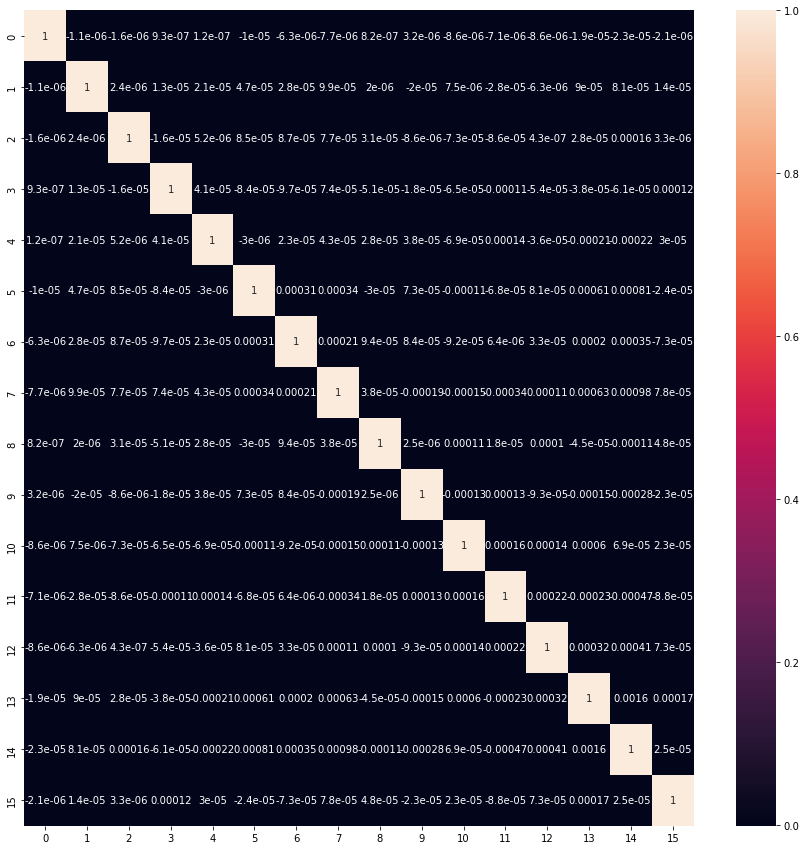

In [62]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [63]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2110, 16)

### Applying logistic regression on the data on our Principal components

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
learner_pca = LogisticRegression()

In [66]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [67]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [68]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

#### Making it a little more unsupervised 

In [69]:
pca_again = PCA(0.9)

In [70]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [71]:
df_train_pca2.shape

(4923, 14)

Following it up with a logistic regression model

In [72]:
learner_pca2 = LogisticRegression()

In [73]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [74]:
df_test_pca2 = pca_again.transform(X_test)

In [75]:
df_test_pca2.shape

(2110, 14)

In [76]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [77]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'

PCA is great!